# <center> Analisa Menjelang Piala Dunia </center>

oleh : Ferdinand Winstein

[Dataset](https://www.kaggle.com/code/raphaelmarconato/world-cup-2022-eda/data)

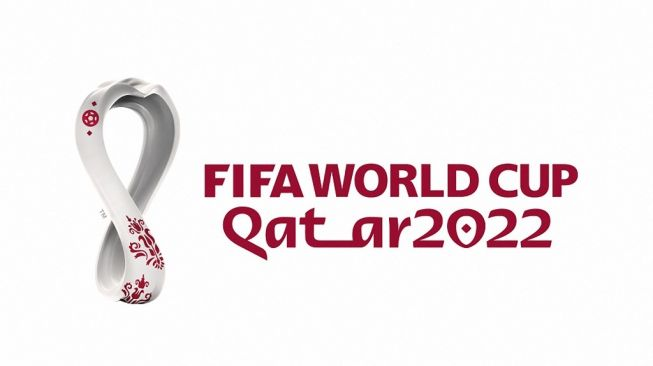

# Step 1. Persiapkan Dataset dan Package

In [1]:
#Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset

df = pd.read_csv('international_matches.csv')
# pd.set_option('display.max_rows', None, )
# df
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# melihat isi tiap kolom dari dataset (menentukan perlu cleaning bagian mana)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [4]:
# melihat statistik deskriptif dari dataset

df.describe().round()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.0,23921.0,23921.0,23921.0,23921.0,23921.0,8379.0,8095.0,7787.0,8510.0,8162.0,7564.0,8312.0,7979.0
mean,78.0,81.0,323.0,315.0,2.0,1.0,75.0,74.0,75.0,76.0,76.0,74.0,75.0,75.0
std,52.0,53.0,501.0,491.0,2.0,1.0,8.0,8.0,6.0,6.0,6.0,6.0,6.0,6.0
min,1.0,1.0,0.0,0.0,0.0,0.0,47.0,47.0,53.0,53.0,54.0,53.0,53.0,54.0
25%,33.0,36.0,0.0,0.0,0.0,0.0,70.0,69.0,71.0,72.0,72.0,70.0,71.0,72.0
50%,71.0,73.0,0.0,0.0,1.0,1.0,75.0,74.0,75.0,76.0,76.0,74.0,75.0,76.0
75%,115.0,119.0,547.0,523.0,2.0,2.0,81.0,80.0,79.0,80.0,80.0,78.0,80.0,79.0
max,211.0,211.0,2164.0,2164.0,31.0,21.0,97.0,97.0,92.0,93.0,93.0,92.0,93.0,93.0


# Step 2. Data Cleaning

## Menghapus Kolom yang tidak dipakai

In [5]:
# kolom2 ini dirasa 'sampah' jadi kita delete

del df['away_team_continent']
del df['home_team_continent']

del df['tournament']
del df['city']
del df['country']
del df['neutral_location']

df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,59,22,0,0,3,1,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8,14,0,0,1,1,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35,94,0,0,5,0,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65,86,0,0,1,0,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67,5,0,0,1,3,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,932,1040,2,1,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,192,135,895,1105,0,2,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,28,60,1526,1387,0,0,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,23,35,1553,1499,0,3,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


## Data 4 Tahun Terakhir

Kita mengambil data pertandingan dari tahun 2019 saja, dengan harapan data-data ini adalah yang paling relevan

In [6]:
df = df[df['date'] > '2019-01-01']
df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
20900,2019-01-02,Oman,Thailand,82,118,1295,1160,2,0,No,Win,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20901,2019-01-05,United Arab Emirates,Bahrain,79,113,1309,1178,1,1,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20902,2019-01-06,Thailand,India,118,97,1160,1240,1,4,No,Lose,NaN,63.0,NaN,NaN,NaN,62.0,63.7,60.0
20903,2019-01-06,Australia,Jordan,41,109,1436,1196,0,1,No,Lose,78.0,NaN,73.2,69.7,75.8,NaN,NaN,NaN
20904,2019-01-06,Syria,Palestine,74,99,1322,1236,0,0,No,Draw,NaN,NaN,NaN,NaN,69.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,932,1040,2,1,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,192,135,895,1105,0,2,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,28,60,1526,1387,0,0,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,23,35,1553,1499,0,3,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [7]:
temp = df.sort_values(['home_team','date'], ascending =[True,False])
df['latest'] = temp.groupby('home_team').cumcount()+1
df = df[df['latest'] == 1].drop('latest',axis=1)
df

C:\Users\Winstein\AppData\Local\Temp\ipykernel_8000\571633946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latest'] = temp.groupby('home_team').cumcount()+1


,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
21128,2019-06-06,Bhutan,Guam,186,193,917,907,1,0,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21131,2019-06-06,Macau,Sri Lanka,183,202,925,886,1,0,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21222,2019-06-11,Brunei Darussalam,Mongolia,194,187,903,915,2,1,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21224,2019-06-11,Pakistan,Cambodia,200,173,888,967,1,2,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21360,2019-07-15,Tonga,Vanuatu,202,163,868,997,0,14,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,180,153,932,1040,2,1,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,192,135,895,1105,0,2,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,28,60,1526,1387,0,0,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,23,35,1553,1499,0,3,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


## Tim yang bertanding

Kita menggunakan / menghitung 32 tim yang ikut dalam piala dunia 

In [8]:
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA', 
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France',  
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany',  
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia',  
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [9]:
df = df[df['home_team'].isin(teams_worldcup)]
df

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23497,2022-03-24,Brazil,Chile,2,26,1823,1543,4,0,No,Win,89.0,79.0,84.8,86.3,85.5,75.5,76.7,78.2
23516,2022-03-25,Cameroon,Algeria,38,43,1480,1460,0,1,No,Lose,67.0,78.0,76.8,77.7,75.0,78.0,81.0,78.0
23615,2022-03-29,Qatar,Slovenia,52,64,1437,1375,0,0,No,Draw,NaN,91.0,NaN,NaN,NaN,73.0,77.0,76.2
23656,2022-06-01,Ghana,Madagascar,60,102,1387,1205,3,0,No,Win,74.0,NaN,75.5,76.0,78.2,70.5,NaN,67.5
23667,2022-06-02,Tunisia,Equatorial Guinea,35,99,1499,1210,4,0,No,Win,NaN,NaN,70.8,72.3,74.0,NaN,NaN,NaN
23734,2022-06-05,Serbia,Slovenia,25,65,1547,1378,4,1,No,Win,80.0,91.0,75.8,80.3,81.8,73.0,77.0,76.2
23741,2022-06-05,Argentina,Estonia,4,110,1765,1169,5,0,No,Win,84.0,NaN,82.2,89.0,84.0,NaN,NaN,NaN
23753,2022-06-06,Croatia,France,16,3,1621,1789,1,1,No,Draw,82.0,87.0,77.8,76.7,84.2,84.2,88.3,86.8
23764,2022-06-07,Senegal,Rwanda,20,136,1584,1097,1,0,No,Win,83.0,NaN,79.0,80.7,79.0,NaN,NaN,NaN
23794,2022-06-08,Belgium,Poland,2,26,1827,1544,6,1,No,Win,89.0,87.0,80.8,85.7,85.5,75.2,84.7,75.8


# Step 3. Data Analysis and Visualisation

## Analisa dengan `corr`

In [10]:
# melihat korelasi antar value

df.corr()

C:\Users\Winstein\AppData\Local\Temp\ipykernel_8000\3501094260.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
home_team_fifa_rank,1.000000,0.208380,-0.949773,-0.224410,-0.338878,-0.224260,-0.687381,-0.248850,-0.766009,-0.751404,-0.738076,-0.409361,-0.150017,-0.393746
away_team_fifa_rank,0.208380,1.000000,-0.234343,-0.973802,0.286809,-0.418626,-0.185289,-0.568174,-0.268270,-0.112142,-0.417703,-0.751715,-0.772516,-0.861786
home_team_total_fifa_points,-0.949773,-0.234343,1.000000,0.220327,0.360805,0.217338,0.685564,0.263080,0.790339,0.796273,0.792481,0.335139,0.176033,0.313969
away_team_total_fifa_points,-0.224410,-0.973802,0.220327,1.000000,-0.296090,0.406957,0.205890,0.612900,0.228810,0.098998,0.392051,0.807230,0.834652,0.892439
home_team_score,-0.338878,0.286809,0.360805,-0.296090,1.000000,-0.235223,0.309986,0.055105,0.169923,0.287394,0.345935,-0.075617,-0.052437,-0.182172
away_team_score,-0.224260,-0.418626,0.217338,0.406957,-0.235223,1.000000,-0.026897,0.383266,0.242070,0.172762,0.280192,0.100745,0.128927,0.097544
home_team_goalkeeper_score,-0.687381,-0.185289,0.685564,0.205890,0.309986,-0.026897,1.000000,0.374140,0.548240,0.582066,0.545252,0.381545,0.182717,0.300677
away_team_goalkeeper_score,-0.248850,-0.568174,0.263080,0.612900,0.055105,0.383266,0.374140,1.000000,0.336442,0.386460,0.567248,0.556224,0.638884,0.558652
home_team_mean_defense_score,-0.766009,-0.268270,0.790339,0.228810,0.169923,0.242070,0.548240,0.336442,1.000000,0.840795,0.827394,0.321125,0.090708,0.208474
home_team_mean_offense_score,-0.751404,-0.112142,0.796273,0.098998,0.287394,0.172762,0.582066,0.386460,0.840795,1.000000,0.763001,0.161172,0.038138,0.127002


## Analisa dari fifa point

Menganalisa kekuatan masing - masing tim berdasarkan Fifa Points mereka

In [11]:
fifa_point = df.nlargest(10,'home_team_total_fifa_points')
fifa_point

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23794,2022-06-08,Belgium,Poland,2,26,1827,1544,6,1,No,Win,89.0,87.0,80.8,85.7,85.5,75.2,84.7,75.8
23497,2022-03-24,Brazil,Chile,2,26,1823,1543,4,0,No,Win,89.0,79.0,84.8,86.3,85.5,75.5,76.7,78.2
23885,2022-06-13,France,Croatia,3,16,1789,1621,0,1,No,Lose,87.0,82.0,84.2,88.3,86.8,77.8,76.7,84.2
23741,2022-06-05,Argentina,Estonia,4,110,1765,1169,5,0,No,Win,84.0,NaN,82.2,89.0,84.0,NaN,NaN,NaN
23906,2022-06-14,England,Hungary,5,40,1761,1466,0,4,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
23866,2022-06-12,Spain,Czech Republic,7,33,1709,1500,2,0,No,Win,84.0,81.0,86.5,85.0,86.0,77.8,76.7,78.5
23810,2022-06-09,Portugal,Czech Republic,8,33,1674,1500,2,0,No,Win,82.0,81.0,85.2,86.0,84.5,77.8,76.7,78.5
23848,2022-06-11,Mexico,Suriname,9,141,1658,1073,3,0,No,Win,80.0,69.0,76.8,82.7,78.2,71.5,68.3,NaN
23908,2022-06-14,Netherlands,Wales,10,18,1658,1588,3,2,No,Win,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5
23884,2022-06-13,Denmark,Austria,11,34,1653,1500,2,0,No,Win,85.0,74.0,80.2,77.7,80.2,80.2,77.0,80.8


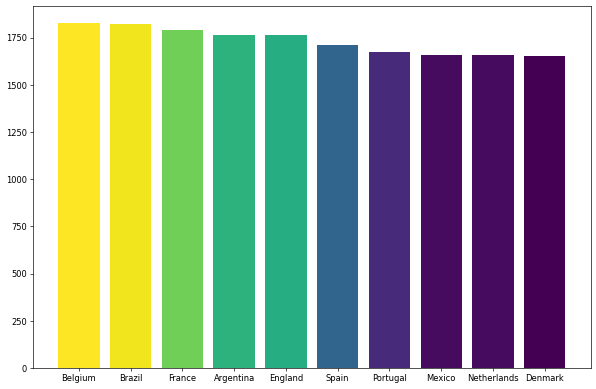

In [12]:
# Visualisasi 10 Tim dengan Fifa Point tertinggi

x = fifa_point['home_team']
y = fifa_point['home_team_total_fifa_points']

plt.figure(figsize=(12, 8), dpi = 60)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x, y, color=my_cmap(rescale(y)))
    
plt.show()

## Analisa dari Offense 

In [13]:
offense_score = df.nlargest(10,'home_team_mean_offense_score')
offense_score

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23741,2022-06-05,Argentina,Estonia,4,110,1765,1169,5,0,No,Win,84.0,NaN,82.2,89.0,84.0,NaN,NaN,NaN
23885,2022-06-13,France,Croatia,3,16,1789,1621,0,1,No,Lose,87.0,82.0,84.2,88.3,86.8,77.8,76.7,84.2
23906,2022-06-14,England,Hungary,5,40,1761,1466,0,4,No,Lose,83.0,85.0,85.0,88.0,84.0,75.5,72.7,73.0
23497,2022-03-24,Brazil,Chile,2,26,1823,1543,4,0,No,Win,89.0,79.0,84.8,86.3,85.5,75.5,76.7,78.2
23810,2022-06-09,Portugal,Czech Republic,8,33,1674,1500,2,0,No,Win,82.0,81.0,85.2,86.0,84.5,77.8,76.7,78.5
23794,2022-06-08,Belgium,Poland,2,26,1827,1544,6,1,No,Win,89.0,87.0,80.8,85.7,85.5,75.2,84.7,75.8
23866,2022-06-12,Spain,Czech Republic,7,33,1709,1500,2,0,No,Win,84.0,81.0,86.5,85.0,86.0,77.8,76.7,78.5
23909,2022-06-14,Poland,Belgium,26,2,1544,1827,0,1,No,Lose,87.0,89.0,75.2,84.7,75.8,80.8,85.7,85.5
23862,2022-06-11,Uruguay,Panama,13,61,1635,1382,5,0,No,Win,80.0,75.0,81.2,84.3,80.0,69.8,70.7,67.5
23908,2022-06-14,Netherlands,Wales,10,18,1658,1588,3,2,No,Win,81.0,74.0,85.2,83.0,83.5,75.0,73.0,78.5


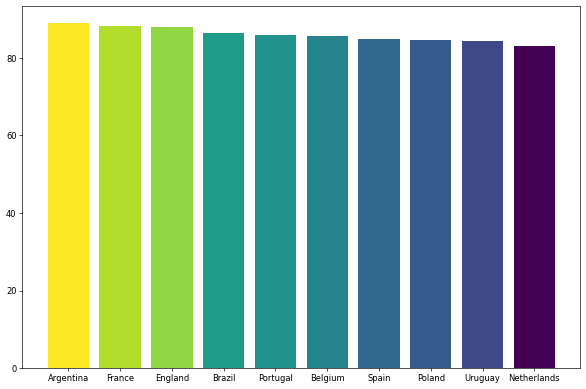

In [14]:
x = offense_score['home_team']
y = offense_score['home_team_mean_offense_score']

plt.figure(figsize=(12, 8), dpi = 60)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x, y, color=my_cmap(rescale(y)))
    
plt.show()

## Apakah ada korelasi antara Fifa Point dengan Menang-Kalah

Disini kita menganalisa 2 series data yakni Fifa Point tim dengan hasil pertandingan (menang, kalah, imbang)

In [15]:
# pertama, kita buat dulu fungsi untuk menentukan tim mana yang menang / kalah

def victory(home, away, home_score, away_score):
    if home_score > away_score:
        return home
    elif home_score < away_score:
        return away
    else:
        return 'Draw'

In [16]:
# kita tambahkan kolom winner yang berisi tim yang menang

df['winner'] = df.apply(lambda x : victory(x['home_team'],x['away_team'],
                                          x['home_team_score'],x['away_team_score']),axis=1)

# tampilkan
df[['home_team','away_team','winner']]

C:\Users\Winstein\AppData\Local\Temp\ipykernel_8000\19581922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.apply(lambda x : victory(x['home_team'],x['away_team'],


,home_team,away_team,winner
23497,Brazil,Chile,Brazil
23516,Cameroon,Algeria,Algeria
23615,Qatar,Slovenia,Draw
23656,Ghana,Madagascar,Ghana
23667,Tunisia,Equatorial Guinea,Tunisia
23734,Serbia,Slovenia,Serbia
23741,Argentina,Estonia,Argentina
23753,Croatia,France,Draw
23764,Senegal,Rwanda,Senegal
23794,Belgium,Poland,Belgium


In [17]:
# kedua, kita buat  fungsi untuk menentukan tim mana yang memiliki fifa point lebih tinggi

def fifa_point_victory(home, away, home_point, away_point):
    if home_point > away_point:
        return home
    elif home_point < away_point:
        return away
    else:
        return 'Draw'

In [18]:
# sama dengan di atas, kita simpan data tim yang fifa point nya lebih tinggi di kolom better_fifa_points
df['better_fifa_points'] = df.apply(lambda x : fifa_point_victory(x['home_team'],x['away_team'],
                                          x['home_team_total_fifa_points'],x['away_team_total_fifa_points']),axis=1)

# tampilkan
df[['home_team','away_team','winner','better_fifa_points']]

C:\Users\Winstein\AppData\Local\Temp\ipykernel_8000\2882713867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['better_fifa_points'] = df.apply(lambda x : fifa_point_victory(x['home_team'],x['away_team'],


,home_team,away_team,winner,better_fifa_points
23497,Brazil,Chile,Brazil,Brazil
23516,Cameroon,Algeria,Algeria,Cameroon
23615,Qatar,Slovenia,Draw,Qatar
23656,Ghana,Madagascar,Ghana,Ghana
23667,Tunisia,Equatorial Guinea,Tunisia,Tunisia
23734,Serbia,Slovenia,Serbia,Serbia
23741,Argentina,Estonia,Argentina,Argentina
23753,Croatia,France,Draw,France
23764,Senegal,Rwanda,Senegal,Senegal
23794,Belgium,Poland,Belgium,Belgium


In [19]:
# ketiga, kita buat fungsi yang menentukan apakah tim dengan fifa point lebih tinggi berhasil menang atau tidak

def fifa_point_result(winner, better_fifa_points):
    if winner == 'Draw':
        return winner
    elif winner == better_fifa_points:
        return 'Better'
    else:
        return 'Lower'

In [20]:
# simpan dalam kolom result_point
df['result_point'] = df.apply(lambda x : fifa_point_result(x['winner'],x['better_fifa_points']),axis=1)

# tampilkan
df[['home_team','away_team','winner','better_fifa_points','result_point']]

C:\Users\Winstein\AppData\Local\Temp\ipykernel_8000\2606037729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result_point'] = df.apply(lambda x : fifa_point_result(x['winner'],x['better_fifa_points']),axis=1)


,home_team,away_team,winner,better_fifa_points,result_point
23497,Brazil,Chile,Brazil,Brazil,Better
23516,Cameroon,Algeria,Algeria,Cameroon,Lower
23615,Qatar,Slovenia,Draw,Qatar,Draw
23656,Ghana,Madagascar,Ghana,Ghana,Better
23667,Tunisia,Equatorial Guinea,Tunisia,Tunisia,Better
23734,Serbia,Slovenia,Serbia,Serbia,Better
23741,Argentina,Estonia,Argentina,Argentina,Better
23753,Croatia,France,Draw,France,Draw
23764,Senegal,Rwanda,Senegal,Senegal,Better
23794,Belgium,Poland,Belgium,Belgium,Better


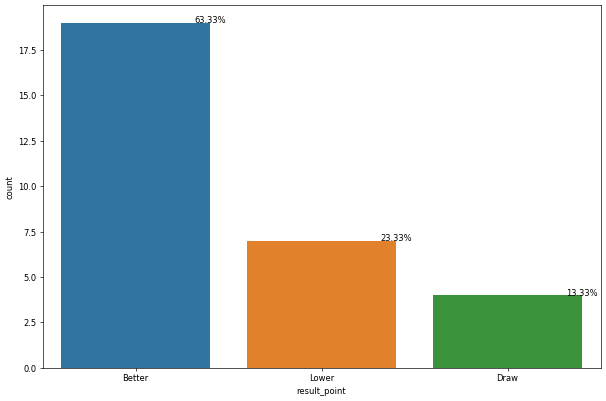

In [21]:
# visualisasi 
plt.figure(figsize=(12, 8), dpi = 60) # mempersiapkan canvas / tempat dan ukuran chart
# figsize menentukan ukuran chart
# dpi menentukan kualitas gambar dari chart

total = len(df) # total banyaknya data
ax = sns.countplot(x='result_point',data=df) # membuat count plot dengan bantuan library seaborn
for p in ax.patches:
    perc = str(round(p.get_height()/total * 100,2))+'%' # menampilkan persentase (di line 7 kita mendapatkan nilai "count", bukan persentase)
    x,y = p.get_xy()
    ax.annotate(perc, (x+p.get_width(),y+p.get_height()),ha = 'center' ) # tampilkan nilai persentase
    
plt.show() # tampilkan chart

# Step 4. Conclusion

- Kita bisa melihat semakin tinggi Fifa Point suatu tim, jumlah kemenangan juga lebih tinggi
- Ketika 2 tim bertanding, 63,33 % kejadian tim dengan fifa point lebih tinggi yang menang
- sedangkan dalam 23,33% kejadian, tim dengan fifa point lebih rendah justru yang menang
- dan hanya 13.33& kejadian, pertandingan berakhir imbang

## Dapat diambil kesimpulan, ketika ada 2 tim yang bertanding, tim dengan FIFA POINTS lebih tinggi memiliki kemungkinan menang yang lebih tinggi 